In [2]:
# import statements
import pandas as pd
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import matplotlib

In [50]:
# DO NOT run this cell twice or it will override all the data preprocessing
# reads in each sheet of data
data_google = Table().read_table("google.csv").drop('Headline','Article')
data_yahoo = Table().read_table("yahoo.csv").drop('Headline','Article')
data_apple = Table().read_table("apple.csv").drop('Top Stories','Article','Unnamed: 10','Factual Reporting','Unnamed: 12','(probably not needed)')
data_interactive_mb = Table().read_table("interactive_mb.csv")

# DATA PREPROCESSING

In [51]:
# adding interactive MB values for Google news
reliability_range = []
bias_range = []
audience = []
for i in range(data_google.num_rows): # for loop iterates through each google row
    publication = data_google.column(0).item(i)
    bool = False
    for k in range(data_interactive_mb.num_rows): # for loop iterates through each interactive MB source
        if (publication == data_interactive_mb.column(0).item(k)):
            reliability_range.append(data_interactive_mb.column(1).item(k))
            bias_range.append(data_interactive_mb.column(2).item(k))
            audience.append(data_interactive_mb.column(3).item(k))
            bool = True
    if bool == False:
        reliability_range.append(np.nan) # nan for values not listed
        bias_range.append(np.nan) # nan for values not listed
        audience.append(np.nan) # nan for values not listed

data_google = data_google.drop('Reliability Range (Interactive MB)','Bias Range (Interactive MB)','Audience (Interactive MB)').with_columns('Reliability Range',reliability_range,
                                                                                                                             'Bias Range',bias_range,
                                                                                                                             'Audience',audience)
# adding interactive MB values for Yahoo news
reliability_range = []
bias_range = []
audience = []
for i in range(data_yahoo.num_rows): # for loop iterates through each yahoo row
    publication = data_yahoo.column(0).item(i)
    bool = False
    for k in range(data_interactive_mb.num_rows): # for loop iterates through each interactive MB source
        if (publication == data_interactive_mb.column(0).item(k)):
            reliability_range.append(data_interactive_mb.column(1).item(k))
            bias_range.append(data_interactive_mb.column(2).item(k))
            audience.append(data_interactive_mb.column(3).item(k))
            bool = True
    if bool == False:
        reliability_range.append(np.nan) # nan for values not listed
        bias_range.append(np.nan) # nan for values not listed
        audience.append(np.nan) # nan for values not listed

data_yahoo = data_yahoo.drop('Reliability Range (Interactive MB)','Bias Range (Interactive MB)','Audience (Interactive MB)').with_columns('Reliability Range',reliability_range,
                                                                                                                             'Bias Range',bias_range,
                                                                                                                             'Audience',audience)
# adding interactive MB values for Apple news
reliability_range = []
bias_range = []
audience = []
for i in range(data_apple.num_rows): # for loop iterates through each apple row
    publication = data_apple.column(0).item(i)
    bool = False
    for k in range(data_interactive_mb.num_rows): # for loop iterates through each interactive MB source
        if (publication == data_interactive_mb.column(0).item(k)):
            reliability_range.append(data_interactive_mb.column(1).item(k))
            bias_range.append(data_interactive_mb.column(2).item(k))
            audience.append(data_interactive_mb.column(3).item(k))
            bool = True
    if bool == False:
        reliability_range.append(np.nan) # nan for values not listed
        bias_range.append(np.nan) # nan for values not listed
        audience.append(np.nan) # nan for values not listed

data_apple = data_apple.drop('Reliability Range (Interactive MB)','Bias Range (Interactive MB)','Audience (Interactive MB)').with_columns('Reliability Range',reliability_range,
                                                                                                                             'Bias Range',bias_range,
                                                                                                                             'Audience',audience)
data_apple

Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 hours?,Reliability Range,Bias Range,Audience
The Texas Tribune,Left-Center,1,"July 11, 2021",nan,nan,nan,nan
National Geographic,Pro-Science,2,"July 11, 2021",nan,46.11,-2.58,nan
CNN,Left,3,"July 11, 2021",nan,43.77,-8.78,"79,900,000"
ESPN,Left-Center,4,"July 11, 2021",nan,nan,nan,nan
The Washington Post,Left-Center,5,"July 11, 2021",nan,44.05,-7.42,"76,195,000"
Miami Herald,Left-Center,6,"July 11, 2021",nan,46.7,-3.86,nan
The Guardian,Left-Center,7,"July 11, 2021",nan,44.42,-9.93,"88,750,000"
REUTERS,Neutral,8,"July 11, 2021",nan,49.3,-1.65,"40,574,000"
REUTERS,Neutral,9,"July 11, 2021",nan,49.3,-1.65,"40,574,000"
ESPN,Left-Center,10,"July 11, 2021",nan,nan,nan,nan


In [52]:
# replacing 'MB/FC Slant' values with numbers from 1-5
# Left - 1, Left-Center - 2, Pro-Science - 2, Neutral - 3, Unknown - 3, nan - 3, Right-Center - 4, Right - 5

# replacing Google's values
new_slants = []
for i in data_google.column('MB/FC Slant'):
    if (i == 'Left'):
        new_slants.append(1)
    elif (i == 'Left-Center'):
        new_slants.append(2)
    elif (i == 'Neutral'):
        new_slants.append(3)
    elif (i == 'Right-Center'):
        new_slants.append(4)
    elif (i == 'Right'):
        new_slants.append(5)
    else:
        new_slants.append(3)
data_google = data_google.with_column('New MB/FC Slant',new_slants)

# replacing Yahoo's values
new_slants = []
for i in data_yahoo.column('MB/FC Slant'):
    if (i == 'Left'):
        new_slants.append(1)
    elif (i == 'Left-Center'):
        new_slants.append(2)
    elif (i == 'Neutral'):
        new_slants.append(3)
    elif (i == 'Right-Center'):
        new_slants.append(4)
    elif (i == 'Right'):
        new_slants.append(5)
    else:
        new_slants.append(3)
data_yahoo = data_yahoo.with_column('New MB/FC Slant',new_slants)

# replacing Apple's values
new_slants = []
for i in data_apple.column('MB/FC Slant'):
    if (i == 'Left'):
        new_slants.append(1)
    elif (i == 'Left-Center'):
        new_slants.append(2)
    elif (i == 'Neutral'):
        new_slants.append(3)
    elif (i == 'Right-Center'):
        new_slants.append(4)
    elif (i == 'Right'):
        new_slants.append(5)
    else:
        new_slants.append(3)
data_apple = data_apple.with_column('New MB/FC Slant',new_slants)
data_apple

Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 hours?,Reliability Range,Bias Range,Audience,New MB/FC Slant
The Texas Tribune,Left-Center,1,"July 11, 2021",nan,nan,nan,nan,2
National Geographic,Pro-Science,2,"July 11, 2021",nan,46.11,-2.58,nan,3
CNN,Left,3,"July 11, 2021",nan,43.77,-8.78,"79,900,000",1
ESPN,Left-Center,4,"July 11, 2021",nan,nan,nan,nan,2
The Washington Post,Left-Center,5,"July 11, 2021",nan,44.05,-7.42,"76,195,000",2
Miami Herald,Left-Center,6,"July 11, 2021",nan,46.7,-3.86,nan,2
The Guardian,Left-Center,7,"July 11, 2021",nan,44.42,-9.93,"88,750,000",2
REUTERS,Neutral,8,"July 11, 2021",nan,49.3,-1.65,"40,574,000",3
REUTERS,Neutral,9,"July 11, 2021",nan,49.3,-1.65,"40,574,000",3
ESPN,Left-Center,10,"July 11, 2021",nan,nan,nan,nan,2


# ALL TABLES

In [54]:
data_google

Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 Hours?,Bipartisan Press Bias,Reliability Range,Bias Range,Audience,New MB/FC Slant
The Hill,Neutral,1,"July 11, 2021",1,-1.083446,44.99,-0.38,"24,400,000",3
CNN,Left,2,"July 11, 2021",1,BADLINK,43.77,-8.78,"79,900,000",1
Yahoo News,Left,3,"July 11, 2021",1,-7.042858,nan,nan,nan,1
NBC News,Left-Center,4,"July 11, 2021",1,-1.594434,45.81,-7.46,"26,225,000",2
Fox News,Right,5,"July 11, 2021",1,7.10045,nan,nan,nan,5
POLITICO,Left-Center,6,"July 11, 2021",1,-0.875597,nan,nan,nan,2
ABC News,Left-Center,7,"July 11, 2021",1,0.722995,47.28,-4.9,"39,500,000",2
Business Insider,Left-Center,8,"July 11, 2021",1,-2.200581,nan,nan,nan,2
CNN,Left,9,"July 11, 2021",1,BADLINK,43.77,-8.78,"79,900,000",1
The Hill,Neutral,10,"July 11, 2021",1,-11.197803,44.99,-0.38,"24,400,000",3


In [55]:
data_yahoo

Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 Hours?,Reliability Range,Bias Range,Audience,New MB/FC Slant
Yahoo News,Left-Center,1,"July 11, 2021",1,nan,nan,nan,2
Yahoo News 360,Left-Center,2,"July 11, 2021",1,nan,nan,nan,2
Reuters,Neutral,3,"July 11, 2021",1,49.3,-1.65,"40,574,000",3
Washington Examiner,Right,4,"July 11, 2021",1,nan,nan,nan,5
Associated Press,Neutral,5,"July 11, 2021",1,nan,nan,nan,3
The Week,Left,6,"July 11, 2021",1,nan,nan,nan,1
Washington Examiner,Right,7,"July 11, 2021",1,nan,nan,nan,5
Associated Press,Neutral,8,"July 11, 2021",1,nan,nan,nan,3
Axios,Left-Center,9,"July 11, 2021",1,nan,nan,nan,2
BBC,Left-Center,10,"July 11, 2021",1,nan,nan,nan,2


In [56]:
data_apple

Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 hours?,Reliability Range,Bias Range,Audience,New MB/FC Slant
The Texas Tribune,Left-Center,1,"July 11, 2021",nan,nan,nan,nan,2
National Geographic,Pro-Science,2,"July 11, 2021",nan,46.11,-2.58,nan,3
CNN,Left,3,"July 11, 2021",nan,43.77,-8.78,"79,900,000",1
ESPN,Left-Center,4,"July 11, 2021",nan,nan,nan,nan,2
The Washington Post,Left-Center,5,"July 11, 2021",nan,44.05,-7.42,"76,195,000",2
Miami Herald,Left-Center,6,"July 11, 2021",nan,46.7,-3.86,nan,2
The Guardian,Left-Center,7,"July 11, 2021",nan,44.42,-9.93,"88,750,000",2
REUTERS,Neutral,8,"July 11, 2021",nan,49.3,-1.65,"40,574,000",3
REUTERS,Neutral,9,"July 11, 2021",nan,49.3,-1.65,"40,574,000",3
ESPN,Left-Center,10,"July 11, 2021",nan,nan,nan,nan,2


# Z-TEST

In [128]:
from statsmodels.stats import weightstats as stests

In [86]:
# z-test with 2 sources
ztest, pval = stests.ztest(x1=data_yahoo.column('New MB/FC Slant'), x2=data_apple.column('New MB/FC Slant'))#,
                           #value=0.2582713516286228, alternative = 'two-sided')
print(float(pval))

# result is 5.670895992665408e-06 for Google/Apple without "value" and "alternative" parameters

1.9743992492912942e-17


In [136]:
# z-test with 2 sources
ztest, pval = stests.ztest(x1=data_yahoo.column('New MB/FC Slant'), x2=data_google.column('New MB/FC Slant'))#,
                           #value=0.2582713516286228, alternative = 'two-sided')
print(float(pval))

# result is 5.670895992665408e-06 for Google/Apple without "value" and "alternative" parameters

0.007670145808818254


In [140]:
# z-test with 2 sources
ztest, pval = stests.ztest(x1=data_yahoo.column('New MB/FC Slant'), x2=data_google.column('New MB/FC Slant'))#,
                           #value=0.2582713516286228, alternative = 'two-sided')
print(float(pval))
print(float(ztest))

# result is 5.670895992665408e-06 for Google/Apple without "value" and "alternative" parameters

0.007670145808818254
2.6662551390716454


# ANOVA

In [142]:
from scipy.stats import f_oneway
F, p = f_oneway(data_google.column('New MB/FC Slant'),data_yahoo.column('New MB/FC Slant'),
                data_apple.column('New MB/FC Slant'))
print("p-value for significance is: ", p)
print(F)

p-value for significance is:  5.943315037059893e-13
28.645019091042773


# Visualizations

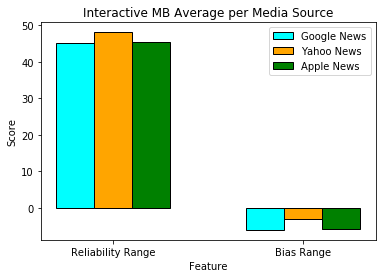

In [153]:
x = np.arange(2)
# y1 = [np.nanmean(data_google.column('Reliability Range')),
#       np.nanmean(data_yahoo.column('Reliability Range')),
#       np.nanmean(data_apple.column('Reliability Range'))]
# y2 = [np.nanmean(data_google.column('Bias Range')),
#       np.nanmean(data_yahoo.column('Bias Range')),
#       np.nanmean(data_apple.column('Bias Range'))]

y1 = [np.nanmean(data_google.column('Reliability Range')),
      np.nanmean(data_google.column('Bias Range'))]
y2 = [np.nanmean(data_yahoo.column('Reliability Range')),
      np.nanmean(data_yahoo.column('Bias Range'))]
y3 = [np.nanmean(data_apple.column('Reliability Range')),
      np.nanmean(data_apple.column('Bias Range'))]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Reliability Range','Bias Range'])
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title('Interactive MB Average per Media Source')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()

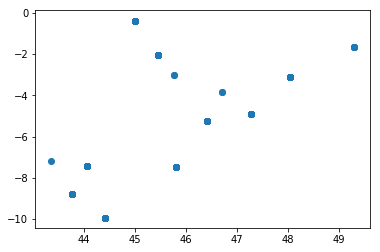

In [127]:
reliability_google = data_google.column('Reliability Range')
reliability_google = reliability_google[~np.isnan(reliability_google)]
bias_google = data_google.column('Bias Range')
bias_google = bias_google[~np.isnan(bias_google)]

plt.scatter(reliability_google,bias_google)

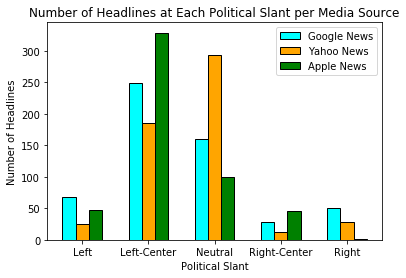

In [154]:
x = np.arange(5)

y1 = [68,249,160,29,51] # numbers for google news
y2 = [25,185,294,12,29] # numbers for yahoo news
y3 = [48,329,100,46,2] # numbers for apple news
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Left','Left-Center','Neutral','Right-Center','Right'])
plt.xlabel("Political Slant")
plt.ylabel("Number of Headlines")
plt.title('Number of Headlines at Each Political Slant per Media Source')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()